In [9]:
import re
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

## Load Fuana Dataset

In [10]:
df = pd.read_csv('../data/fauna.csv.gz', compression='gzip')

## Visualize the number of records in each class

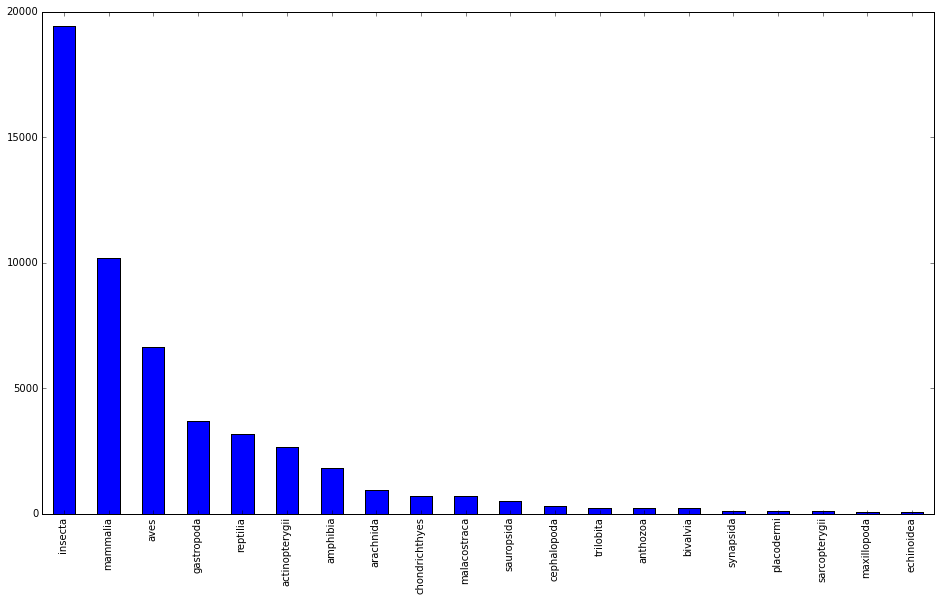

In [11]:
classes = df['class'].value_counts()
figure(figsize=(16, 9))
classes[0:20].plot(kind="bar")

In [17]:
df.set_index(keys=['page-id'])

,class,family,genus,kingdom,order,phylum,species,text,title
page-id,,,,,,,,,
3451749,amphibia,ranidae,rana,animalia,anura,chordata,rboylii,The foothill yellow-legged frog (Rana boylii) ...,Foothill yellow-legged frog
38082824,amphibia,ranidae,lithobates,animalia,anura,chordata,lsylvaticus,This is a redirect from a title with another m...,Wood Frog
1369072,mammalia,bovidae,pantholopshodgson18342,animalia,artiodactyla,chordata,phodgsonii,The Tibetan antelope or chiru (Pantholops hodg...,Tibetan antelope
26625724,mammalia,bovidae,damaliscus,animalia,artiodactyla,chordata,dsuperstes,The Bangweulu tsessebe (Damaliscus superstes) ...,Bangweulu tsessebe
1709509,mammalia,tayassuidae,catagonusameghino1904,animalia,artiodactyla,chordata,cbrachydontuscmetropolitanuscstenocephaluscwag...,The Chacoan peccary or tagua (Catagonus wagner...,Chacoan peccary
3512831,NaN,NaN,chingkankousaurusyoung1958,animalia,saurischia,chordata,cfragilis,"Chingkankousaurus (named for Ch'ing-kang-kou, ...",Chingkankousaurus
262734,aves,opisthocomidae,opisthocomusilliger1811,animalia,opisthocomiformes,chordata,ohoazin,"The hoatzin (Opisthocomus hoazin), also known ...",Hoatzin
3392087,mammalia,dasyproctidae,dasyprocta,animalia,rodentia,chordata,dfuliginosa,"The black agouti, Dasyprocta fuliginosa, is a ...",Black agouti
18936840,mammalia,bovidae,capricornis,animalia,artiodactyla,chordata,cthar,The Himalayan serow (Capricornis thar) also kn...,Himalayan serow


### Create a TFIDF Table

In [38]:
count = 0
limit = df.shape[0]
doc_freq = {}             #doc_freq['word'] += 1
term_freq = {}            #term_freq[234234] = {'word' : count}
word_count_history = []

for index, row in df.iterrows():
    if count < limit and row['text'] != '':
        count += 1
        page_id = row['page-id']
        if page_id in term_freq:
            terms = term_freq[page_id]
        else:
            terms = term_freq[page_id] = {}
        
        # remove puncuation and extra spaces, transfrom to lower case and split on spaces
        word_list = re.sub(r'\W+', ' ', str(row['text']).lower()).split(' ')
        
        for word in word_list:
            if word in terms:
                terms[word] += 1
            else:
                terms[word] = 1
            
            if word in doc_freq:
                doc_freq[word].add(page_id)
            else:
                doc_freq[word] = set()
                doc_freq[word].add(page_id)
                
        word_count_history.append(len(doc_freq))
                
#terms = pd.Series()
#term_frequency = pd.Series()
#document_frequency = pd.Series()

In [ ]:
word_counts = pd.DataFrame(term_freq)
word_counts.sort(ascending=False)
word_counts.head(15)

### Just for fun, how does the number of words increase as we count occurences?

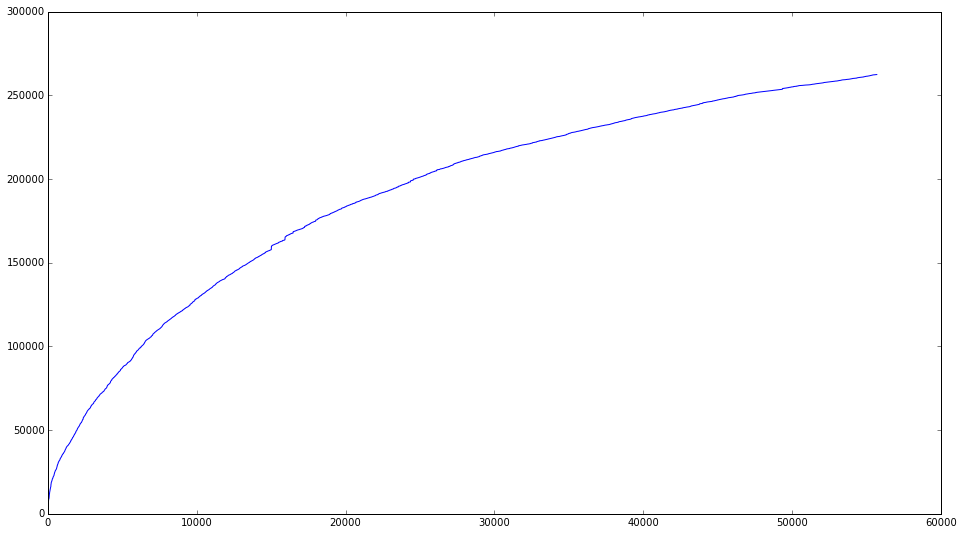

In [39]:
figure(figsize=(16, 9))
plot(word_count_history)